Here, we explore the effect of cosmology on the lensing mass density estimates.

In [25]:
from astropy import units as u
from astropy import constants as const
import numpy as np
from astropy.cosmology import Flatw0waCDM
import matplotlib.pyplot as plt
import corner

def calculate_critical_surface_density(z_lens, z_source, cosmo):
    D_L = cosmo.angular_diameter_distance(z_lens)
    D_S = cosmo.angular_diameter_distance(z_source)
    D_LS = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)

    Sigma_c = (const.c**2 / (4 * np.pi * const.G)) * D_S / (D_LS * D_L)
    return Sigma_c.to(u.Msun / u.pc**2)

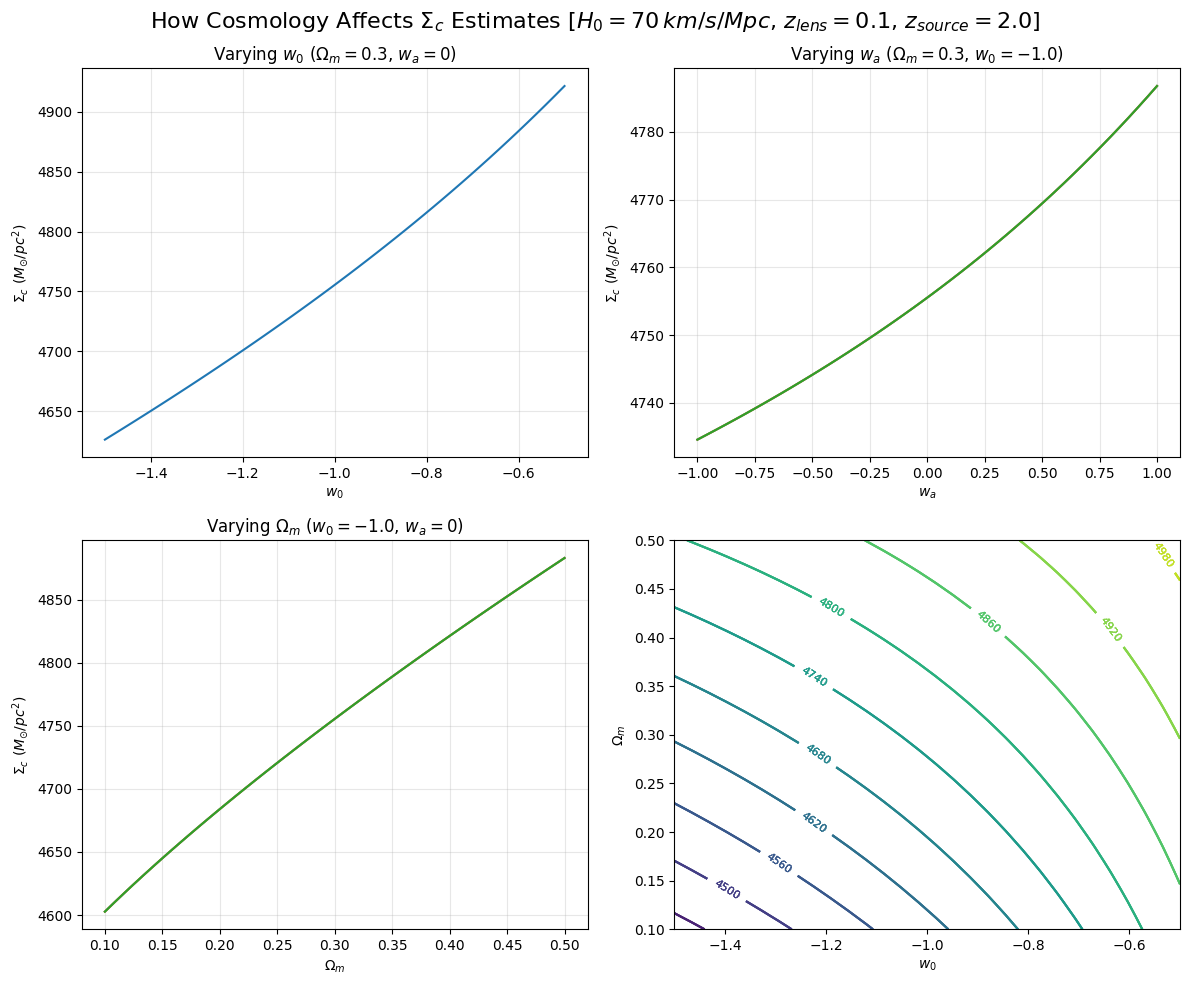

In [21]:
z_lens = 0.1
z_source = 2.0
H0 = 70 * u.km / (u.s * u.Mpc)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Vary w0 (keep Om0=0.3, wa=0, H0=70)
w0_vals_plot = np.linspace(-1.5, -0.5, 50)
Sigma_c_w0 = []
for w0_val in w0_vals_plot:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=w0_val, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_w0.append(Sigma_c_temp.value)

axes[0,0].plot(w0_vals_plot, Sigma_c_w0)
axes[0,0].set_xlabel('$w_0$')
axes[0,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,0].set_title('Varying $w_0$ ($\\Omega_m=0.3$, $w_a=0$)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

fig.suptitle('How Cosmology Affects $\\Sigma_c$ Estimates [$H_0=70 \\, km/s/Mpc$, $z_{lens}=$'+f'{z_lens}, '+'$z_{source}=$'+f'{z_source}]', fontsize=16)

fig.tight_layout()

stddev of mean Sigma_c values across cosmologies: 189.67430916282225
mean of mean Sigma_c values across cosmologies: 4113.339399005417
percentage variation in mean Sigma_c values across cosmologies: 4.611200067971159 %


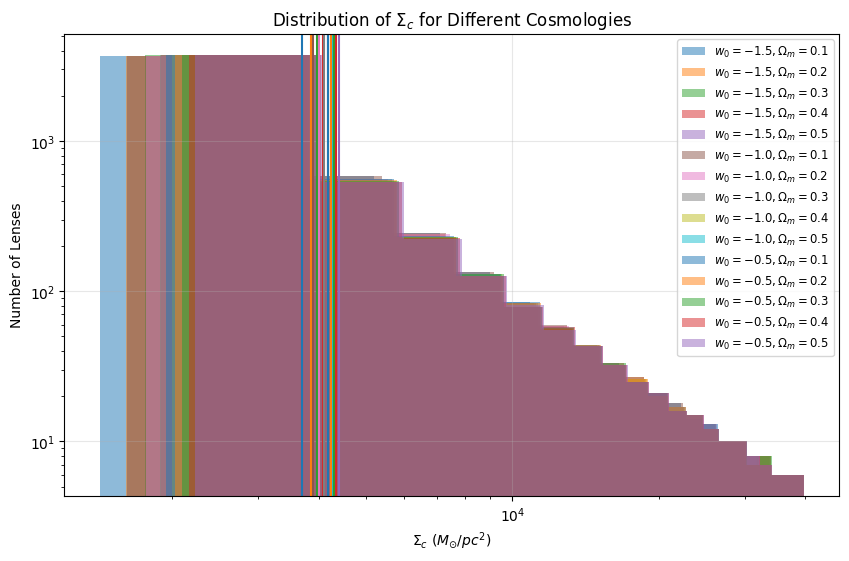

In [41]:
# now we see how Sigma_c changes with cosmology for a population of lenses

z_lens_vals = np.linspace(0.01, 0.5, 5000)
z_source_vals = []
i = 0
while i < len(z_lens_vals):
    z_lens = z_lens_vals[i]
    z_source = np.random.uniform(1.5, 3.0)
    if z_source > z_lens:
        z_source_vals.append(z_source)
    i += 1
z_source_vals = np.array(z_source_vals)

w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3,0.4, 0.5])

Sigma_c_matrix = np.zeros((len(z_lens_vals), len(w0_grid), len(Om0_grid)))
# calaculate Sigma_c function can handle array inputs for z_lens, z_source 

for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens_vals, z_source_vals, cosmo_temp)
        Sigma_c_matrix[:, j, k] = Sigma_c_temp.value

# Show histograms of Sigma_c for different cosmologies in same plot
plt.figure(figsize=(10, 6))
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        plt.hist(Sigma_c_matrix[:, j, k], bins=20, alpha=0.5, label=f'$w_0={w0_val}, \\Omega_m={Om0_val}$')
plt.xlabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_c$ for Different Cosmologies')
plt.legend(loc ='upper right', fontsize='small')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')


# Mean and stddev of Sigma_c for different cosmologies
mean_Sigma_c_vals = np.mean(Sigma_c_matrix, axis=0)
stddev_Sigma_c_vals = np.std(Sigma_c_matrix, axis=0)

num = 0
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        mean_val = mean_Sigma_c_vals[j, k]
        stddev_val = stddev_Sigma_c_vals[j, k]

        # overplot mean and stddev on histograms as vertical lines
        plt.axvline(mean_val, linestyle='-', color='C'+str(num))
        num += 1

print("stddev of mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals))
print("mean of mean Sigma_c values across cosmologies:", np.mean(mean_Sigma_c_vals))
print("percentage variation in mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals)/np.mean(mean_Sigma_c_vals)*100, "%")